In [10]:
import cv2
import torch
from matplotlib import pyplot as plt
%matplotlib inline

from face_ssd_infer import SSD
from utils import vis_detections

In [80]:
device = torch.device("cpu")
conf_thresh = 0.3
target_size = (217, 410)


net = SSD("test")
net.load_state_dict(torch.load('weights/WIDERFace_DSFD_RES152.pth', map_location='cpu'))
net.to(device).eval();

In [ ]:
img_path = './imgs/barca.jpg'

img = cv2.imread(img_path, cv2.IMREAD_COLOR)

detections = net.detect_on_image(img, target_size, device, is_pad=False, keep_thresh=conf_thresh)
vis_detections(img, detections, conf_thresh, show_text=False)

In [1]:
from skimage import io
raw = io.imread('D:/7-30-2019/004_files/000001.tif')

In [2]:
wavelength_map = {
    (0, 4): '975',
    (0, 3): '960',
    (0, 2): '945',
    (0, 1): '930',
    (0, 0): '915',
    (1, 4): '900',
    (1, 3): '890',
    (1, 2): '875',
    (1, 1): '850',
    (1, 0): '835',
    (2, 4): '820',
    (2, 3): '805',
    (2, 2): '790',
    (2, 1): '775',
    (2, 0): '760',
    (3, 4): '745',
    (3, 3): '730',
    (3, 2): '715',
    (3, 1): '700',
    (3, 0): '675',
    (4, 4): '660',
    (4, 3): '645',
    (4, 2): '630',
    (4, 1): '615',
    (4, 0): '600'
}

In [4]:
data = raw

In [105]:
data = cv2.imread('./imgs/test.jpeg', cv2.COLOR_BGR2GRAY)

In [5]:
img_600 = data[4::5, 0::5]

In [13]:
rgb_600 = cv2.merge((img_600, img_600, img_600))
cv2.imwrite("sample_image.png", rgb_600, [cv2.IMWRITE_PNG_COMPRESSION, 0] )

True

In [86]:
rr_600 = data[4::5,0::5]
for j in wavelength_map.keys():
    rr = data[j[0]::5,j[1]::5]
    print(rr.shape)

(218, 409)
(218, 409)
(218, 410)
(218, 410)
(218, 410)
(218, 409)
(218, 409)
(218, 410)
(218, 410)
(218, 410)
(218, 409)
(218, 409)
(218, 410)
(218, 410)
(218, 410)
(217, 409)
(217, 409)
(217, 410)
(217, 410)
(217, 410)
(217, 409)
(217, 409)
(217, 410)
(217, 410)
(217, 410)


In [87]:
rr = data

(217, 410)

In [103]:
rgb_img = cv2.merge((rr, rr, rr))
rgb_600 = cv2.merge((rr_600,rr_600,rr_600))

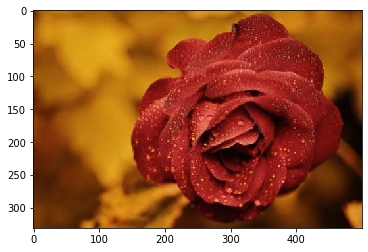

In [106]:
rgb_img.shape
plt.imshow(rr, cmap='gray')

In [107]:
rgb_img = data

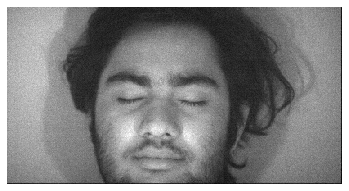

In [90]:
plt.axis("off")
plt.imshow(rr_600,cmap='gray')

In [108]:
detections = net.detect_on_image(rgb_img, target_size, device, is_pad=False, keep_thresh=conf_thresh)
vis_detections(rgb_img, detections, conf_thresh, show_text=False)

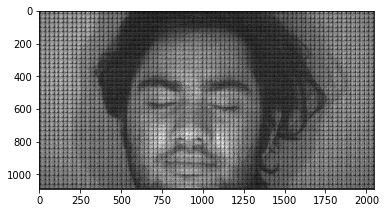

In [98]:
plt.imshow(raw, cmap='gray')

In [37]:
cv_img = cv2.imread('F:/6-11-2019/009_files/000001.tif', cv2.COLOR_BGR2GRAY)

In [38]:
cv_img.shape

(1088, 2048)

In [39]:
from scipy import stats

In [40]:
stats.describe(cv_img.flatten())

DescribeResult(nobs=2228224, minmax=(0, 259), mean=97.434814453125, variance=1484.2611013034546, skewness=0.05493630704367251, kurtosis=-0.8429715841536312)

In [41]:
data = cv_img

In [42]:
rr_600 = data[4::5,0::5]
for j in wavelength_map.keys():
    rr = data[j[0]::5,j[1]::5]

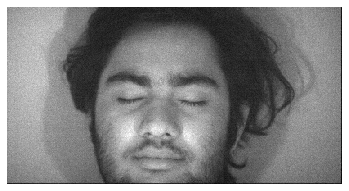

In [43]:
plt.axis("off")
plt.imshow(rr_600, cmap='gray')

In [109]:
detections

array([], shape=(0, 5), dtype=float32)

In [93]:
detections[0]

array([105.48883 ,  26.763042, 276.15512 , 221.51192 ,   0.998946],
      dtype=float32)

In [94]:
rgb_img.shape

(217, 410, 3)

In [95]:
bbox = [int(i) for i in detections[0][0:4]]

In [99]:
cut_image = rr[bbox[1]:bbox[3], bbox[0]:bbox[2]]

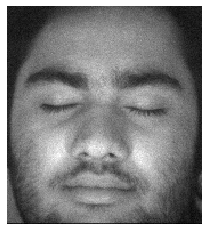

In [100]:
plt.axis("off"); plt.imshow(cut_image, cmap='gray')

In [122]:
height = bbox[3] - bbox[1]
width = bbox[2] - bbox[0]

In [133]:
cut_image = rr[(bbox[1] + int(0.1*height)): (bbox[1] + int(0.2*height)), (bbox[0] + int(0.3*width) ) : (bbox[0] + int(0.7*width))]

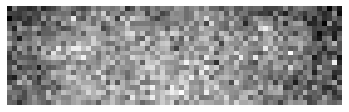

In [134]:
plt.axis("off"); plt.imshow(cut_image, cmap='gray')